# Using several inputs for the Score 


In [3]:
%matplotlib inline
# Importamos los clásicos
import numpy as np
import matplotlib.pylab as plt
# Importamos los módulos más especializados
import pandas as pd
import seaborn as sns


In [4]:
meta_df = pd.read_table('meta_scores.csv', index_col=0)

# Quitar human
mask1 = meta_df['env_package'] == 'human-gut'
mask2 = meta_df['env_package'] == 'human-associated'

# unir las máscaras
mask = mask1 | mask2
# invertir (esta operación solo funciona con arreglos binarios)
mask = ~mask

# aplicamos la mascara al dataframe
meta_df = meta_df[mask]

In [6]:
#meta_df.count()
print(meta_df.columns)
print(meta_df.index)


Index(['MSL', 'Sscore_2017', 'Sscore_2014', '30', '60', '100', '150', '200',
       '250', '300', 'biome', 'feature', 'material', 'env_package', 'location',
       'latitude', 'longitude', 'depth'],
      dtype='object')
Float64Index([4557998.3, 4557997.3, 4557996.3, 4557995.3, 4557994.3, 4557993.3,
              4557992.3, 4557991.3, 4557990.3, 4557989.3,
              ...
              4440102.3, 4440090.3, 4440067.3, 4440061.3, 4440060.4, 4440041.3,
              4440039.3, 4440038.3, 4440037.3, 4440036.3],
             dtype='float64', name='ID ', length=924)


(0, 18)

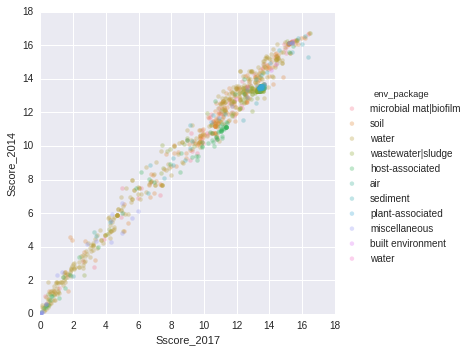

In [9]:
# lmplot crea imágenes de regresión lineal.

# Con la opcción hue le estamos pidiendo que use la columna env_package para colorear los
# puntos

# Con la opción fit_reg=False, le estoy pidiendo que NO ponga las regresiones
sns.lmplot(data=meta_df, x='Sscore_2017', y='Sscore_2014', 
           hue='env_package', 
           fit_reg=False, 
           scatter_kws={'alpha':0.3})
plt.xlim((0, 18))
plt.ylim((0, 18))

#plt.savefig('SS_SSpfam_color_scatter.png', dpi=200)

Con el mismo comando, podemos pedirle que separe los datos en diferentes gráficas, usando los datos de la columna env_package

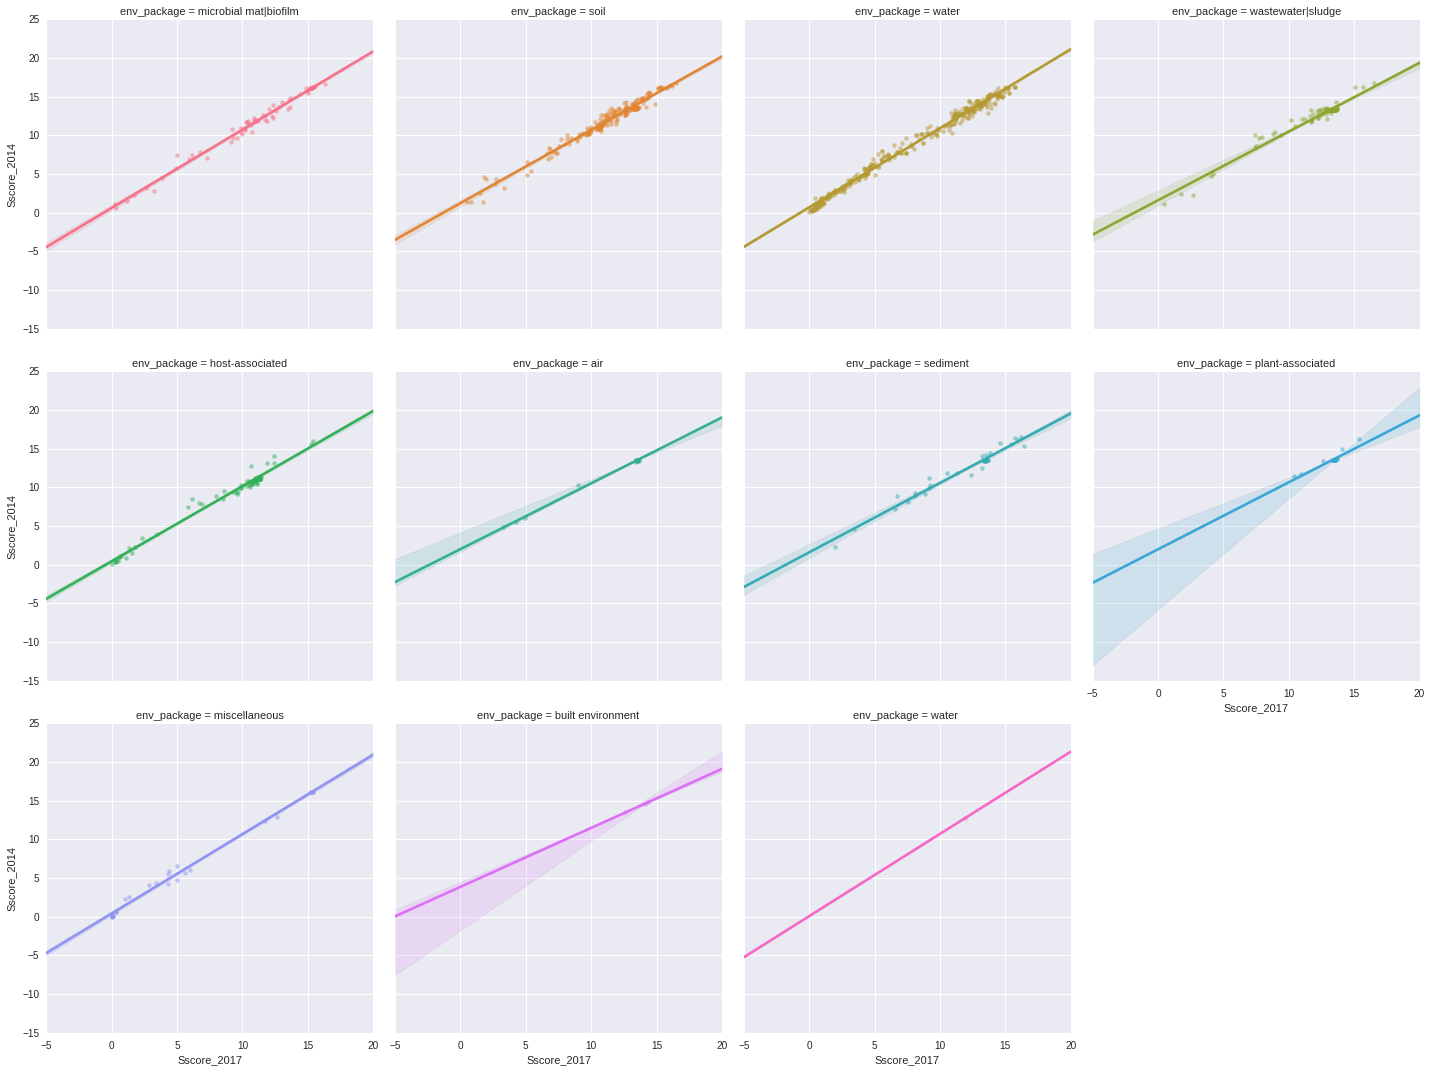

In [10]:
sns.lmplot(data=meta_df, x='Sscore_2017', y='Sscore_2014', 
           hue='env_package',  # las categorias de env_package usando colores
           col='env_package',  # las mismas categorías en las columnas de la gráfica
           col_wrap = 4,       # únicamente 4 columnas de gráficas
           fit_reg=True,       # le pedimos que si ponga la regreción con sus CI
           scatter_kws={'alpha':0.5})

In [11]:
from scipy import stats

Hacemos una función que haga todo el analisis y las gráficas. Así ya no tenemos que copiar y pegar todo el tiempo

In [12]:
def plot_reg(x_label, y_label, df, color=None):
    """Easy function to plot the regression of two
    variabels in a df and to draw the values of the 
    analysis. Uses seaborn module and scipy.stats.
    
    Parameters:
    ============
    
    - x_label: string.
               Name of the column in df to plot in x
    - y_label: string
               Name fo the column in df to plot in y
    - df: Pandas DataFrame
    - color: scatter color"""
    # - Calculate linear regression
    reg = stats.linregress(df[x_label], df[y_label])
    # - plot data
    g = sns.regplot(x_label, y_label, data=df, 
                    truncate=True,
                    scatter_kws={'alpha':0.4})
    # - Annotate de regression values
    s = "$r^2 = {:.3}$\n".format(reg.rvalue**2) +\
        "$p-value_r = {:.2}$\n".format(reg.pvalue) +\
        "Model: $y = {:.2}x +{:.2}$".format(reg.slope, reg.intercept)
    plt.annotate(s=s, 
                 xy=(.05, .75), 
                 bbox=dict(boxstyle="round", fc="w"),
                 xycoords='axes fraction')
    return g, reg

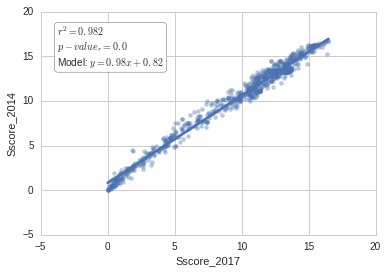

In [13]:
#plt.subplot(121)
x= 'Sscore_2017'
y = 'Sscore_2014'

with sns.axes_style("whitegrid"):
    plot_reg(x, y, meta_df)
#plt.savefig('{}_vs_{}.png'.format(x,y), dpi=200)



# Estos scatter solo son para visualizar los datos

In [14]:
if 'Length' in meta_df.columns:
    del meta_df['Length']

In [24]:
columns = ['SS', 'SS PFAM', 'SS Ox_Red', 'SS puf', 'SS SRa']

indices = np.tril_indices(len(columns), k=-1)

for i, j in zip(indices[0], indices[1]):
    col1 = columns[i]
    col2 = columns[j]
    reg = stats.linregress(meta_df[col1], meta_df[col2])
    print("{:<15}vs {:<15}r-value = {:.4}".format(col1, col2, reg.rvalue**2))

SS PFAM        vs SS             r-value = 0.7734
SS Ox_Red      vs SS             r-value = 0.897
SS Ox_Red      vs SS PFAM        r-value = 0.6137
SS puf         vs SS             r-value = 0.2967
SS puf         vs SS PFAM        r-value = 0.2093
SS puf         vs SS Ox_Red      r-value = 0.3062
SS SRa         vs SS             r-value = 0.5524
SS SRa         vs SS PFAM        r-value = 0.2265
SS SRa         vs SS Ox_Red      r-value = 0.4891
SS SRa         vs SS puf         r-value = 0.08348


/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


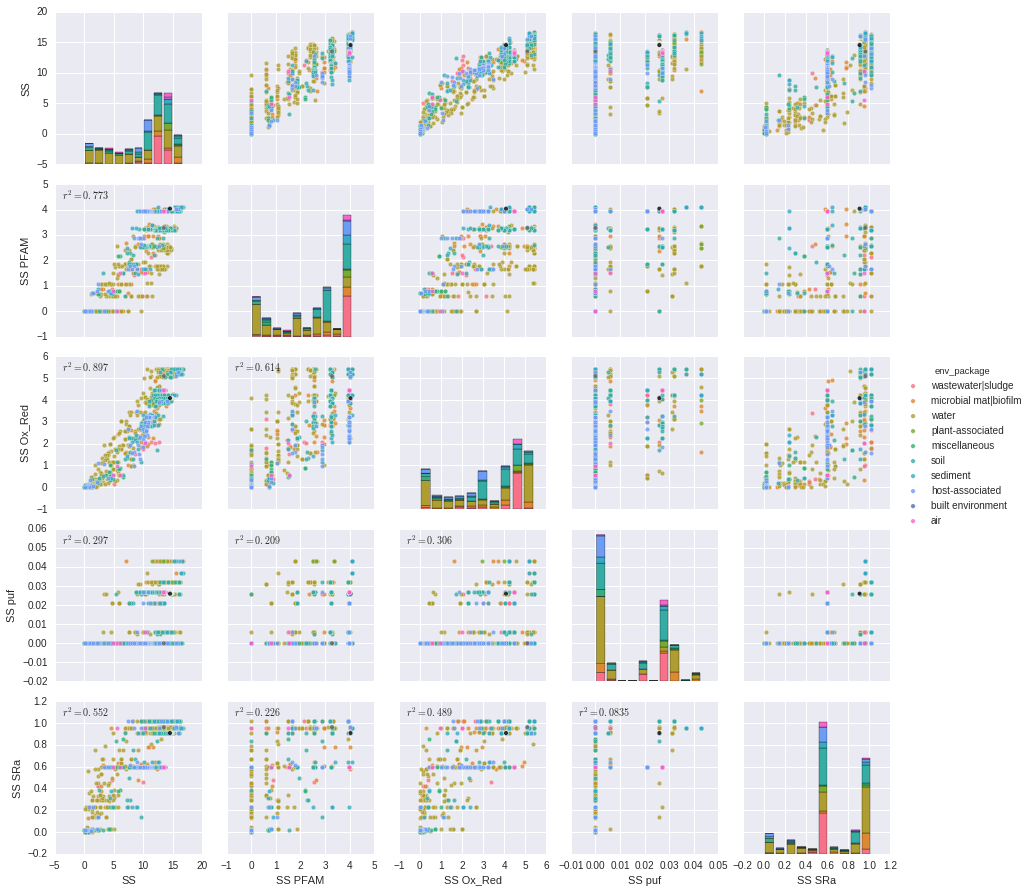

In [25]:
all_scatter = sns.pairplot(data=meta_df,
             hue='env_package',
             plot_kws={'alpha':0.8})

axes = all_scatter.axes

for i, j in zip(indices[0], indices[1]):
    col1 = columns[i]
    col2 = columns[j]
    ax = axes[i, j]
    reg = stats.linregress(meta_df[col1], meta_df[col2])
    text = "$r^2 = {:.3}$".format(reg.rvalue**2)
    ax.annotate(text, (0.05, 0.9), xycoords='axes fraction')

plt.savefig('scatter_allVSall.png', dpi=300)

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


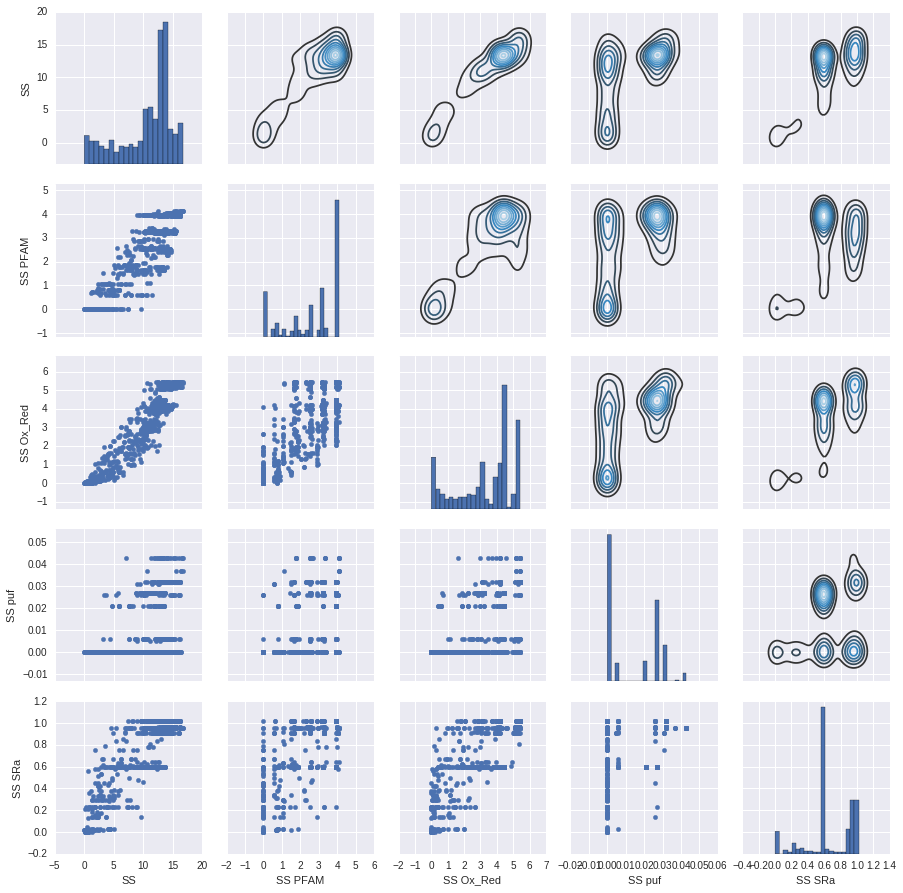

In [26]:
g = sns.PairGrid(meta_df, diag_sharey=False)
g.map_lower(plt.scatter )
g.map_upper(sns.kdeplot, cmap="Blues_d")
g.map_diag(plt.hist, bins=20)

## Metagenomas con mayor SS



In [27]:
columns = ['SS', 'SS PFAM', 'SS Ox_Red', 'SS puf', 'SS SRa']

# calcular los psercentiles
percentiles = []

for col in columns:
    data = meta_df[col]
    perc = np.percentile(data, 95)
    percentiles.append(perc)


In [28]:
# crear las listas de meatgenomas
listas_meta = []

for i, col in enumerate(columns):
    perc = percentiles[i]
    mask = meta_df[col] >= perc
    metas = meta_df.index[mask]
    listas_meta.append(metas)

In [29]:
# número de metagenomas en percentil 95
for i, col in enumerate(columns):
    print(col, ' n95 = {}'.format(len(listas_meta[i])))

SS  n95 = 47
SS PFAM  n95 = 297
SS Ox_Red  n95 = 48
SS puf  n95 = 132
SS SRa  n95 = 141


In [30]:
# tamaño del conjunto interseccion

for i, j in zip(indices[0], indices[1]):
    col1 = columns[i]
    col2 = columns[j]
    set1 = set(listas_meta[i])
    set2 = set(listas_meta[j])
    union_l = len(set1.intersection(set2))
    print("{:<15}vs {:<15}tamaño de la interseccion = {}".format(col1, col2, union_l))

SS PFAM        vs SS             tamaño de la interseccion = 17
SS Ox_Red      vs SS             tamaño de la interseccion = 23
SS Ox_Red      vs SS PFAM        tamaño de la interseccion = 2
SS puf         vs SS             tamaño de la interseccion = 29
SS puf         vs SS PFAM        tamaño de la interseccion = 14
SS puf         vs SS Ox_Red      tamaño de la interseccion = 44
SS SRa         vs SS             tamaño de la interseccion = 29
SS SRa         vs SS PFAM        tamaño de la interseccion = 0
SS SRa         vs SS Ox_Red      tamaño de la interseccion = 36
SS SRa         vs SS puf         tamaño de la interseccion = 61


In [31]:
temp = {columns[i]: pd.Series(listas_meta[i].get_values())for i in range(len(columns))}
metas95 = pd.DataFrame(temp)
metas95.to_csv('meta_perc95_allscores.tab', sep='\t')

In [32]:
x = meta_df.loc[listas_meta[0]]['feature']

In [33]:
np.unique(x, return_counts=True)


(array(['alkaline salt lake', 'biofilm', 'coast', 'estuarine bulk water',
        'hydrographic feature', 'intertidal zone', 'lake',
        'marine benthic feature', 'marine habitat',
        'marine oligotrophic desert', 'microbial feature',
        'plant-associated habitat', 'prairie', 'soil', 'terrestrial habitat'], dtype=object),
 array([10,  1,  1,  2,  3,  8,  2,  3,  3,  4,  1,  1,  3,  3,  2]))

In [34]:
# voy a dejar las notas por si las flies

for i, col in enumerate(columns):
    data = listas_meta[i]
    subdf = meta_df.loc[data]['feature']
    counts = np.unique(subdf, return_counts=True)
    dica = {'feature': counts[0], 'count': counts[1]}
    newdf = pd.DataFrame(dica)
    col = col.replace(' ', '_')
    newdf.to_csv('{}-metas_perc95.tab'.format(col), sep='\t')